# **Lesson4: Computer Vision Fundamentals**
## Color Selection
To get the white lane line I make the threshold array. The value of pixel which is less than the threshold will be rewrited to "0". So it will be turned to black color.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

type: <class 'numpy.ndarray'>
dimensions: (540, 960, 3)


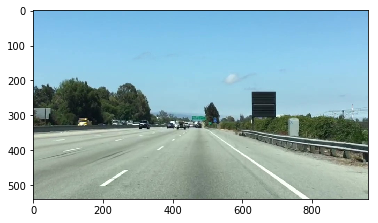

In [2]:
img = mpimg.imread('test.jpg')
plt.imshow(img)
print("type: {}\ndimensions: {}".format(type(img), img.shape))

In [3]:
ysize = img.shape[0]
xsize = img.shape[1]

color_select = np.copy(img)

In [4]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

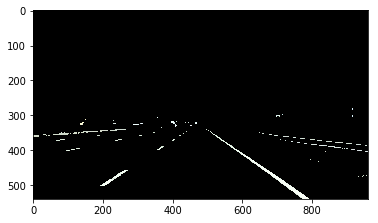

In [5]:
# Bit operation => the output value is 0 or 1.
color_thresholds = (img[:,:,0] < rgb_threshold[0]) \
                    | (img[:,:,1] < rgb_threshold[1]) \
                    | (img[:,:,2] < rgb_threshold[2])

color_select[color_thresholds] = [0,0,0]

plt.imshow(color_select)
plt.show()

## Region Masking

In [7]:
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize/2]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]),(left_bottom[1], right_bottom[1]), 1)

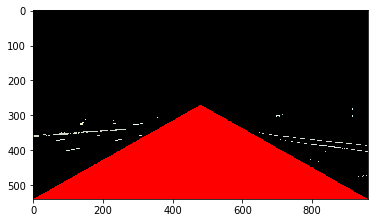

In [8]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) \
                    & (YY > (XX*fit_right[0] +fit_right[1])) \
                    & (YY < (XX*fit_bottom[0] + fit_bottom[1]))
color_select[region_thresholds] = [255, 0, 0]
plt.imshow(color_select)

## Combine Color Selection and  Region Masking

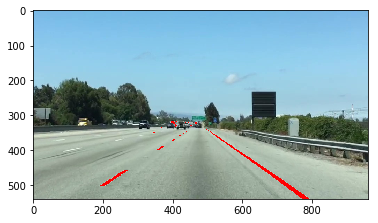

In [11]:
line_image = np.copy(img)
line_image[~color_thresholds  & region_thresholds] = [255, 0, 0]
plt.imshow(line_image)